In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#plot 
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import joblib

In [3]:
df = pd.read_csv('cleaned_social media influencers - instagram.csv')
df.head()

,Influencer insta name,Category,Followers,Top audience country,Authentic engagement,Engagement average
0,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0
1,__youngbae__,Music,12700000.0,Indonesia,478000.0,542300.0
2,_agentgirl_,Shows,18800000.0,Russia,310800.0,377900.0
3,_imyour_joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0
4,_jeongjaehyun,Music,11100000.0,Indonesia,2500000.0,3100000.0


In [4]:
# Select features
categorical_cols = ['Influencer insta name', 'Category', 'Top audience country']
numerical_cols = ['Followers', 'Authentic engagement', 'Engagement average']

In [5]:
# Encode categorical columns using Label Encoding (or OneHot if needed)
df_encoded = df.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### Define Features and Target

In [7]:
# Define features and target
X = df_encoded[categorical_cols + numerical_cols].copy()

In [8]:
# Let's create a target column if not provided — e.g., "High Engagement" if engagement average > median
df_encoded['Target'] = (df_encoded['Engagement average'] > df_encoded['Engagement average'].median()).astype(int)
y = df_encoded['Target']

In [9]:
# Let's create a target column if not provided — e.g., "High Engagement" if engagement average > median
df_encoded['Target'] = (df_encoded['Engagement average'] > df_encoded['Engagement average'].median()).astype(int)
y = df_encoded['Target']

In [10]:
# Scale numeric columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

### Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Modeling Logistic Regression

In [14]:
logistic_r = LogisticRegression(max_iter=1000)
logistic_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# predict
y_pred_lr = logistic_r.predict(X_test)

### Decision Tree

In [17]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# predict 
y_pred_dt = dtree.predict(X_test)

### Random Forest

In [20]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# predict 
y_pred_rf = random_forest.predict(X_test)

###  Evaluate the Model

In [23]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.975
Precision: 1.0
Recall: 0.9509803921568627
F1 Score: 0.9748743718592965
Confusion Matrix:
 [[98  0]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        98
           1       1.00      0.95      0.97       102

    accuracy                           0.97       200
   macro avg       0.98      0.98      0.97       200
weighted avg       0.98      0.97      0.97       200


--- Decision Tree ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 98   0]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score

### Save Best Model

In [25]:
joblib.dump(logistic_r, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

###  Load the model 

In [27]:
loaded_model = joblib.load('logistic_regression_model.pkl')

# Predict using the loaded model
y_pred = loaded_model.predict(X_test)

## Confusion Matrix 

In [29]:
models = {
    'Logistic Regression': logistic_r,
    'Decision Tree': dtree,
    'Random Forest': random_forest
}

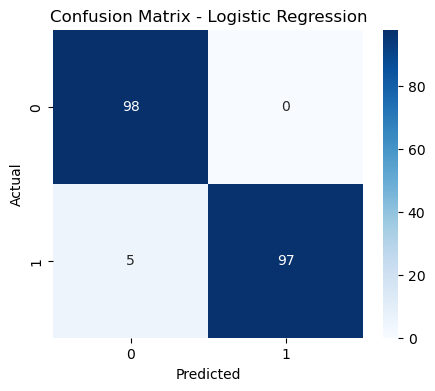

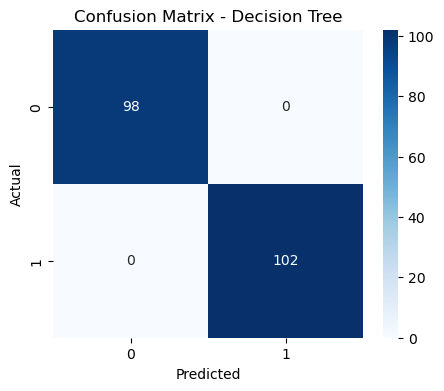

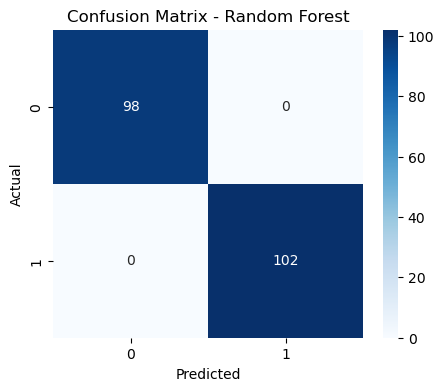

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## ROC Curve 

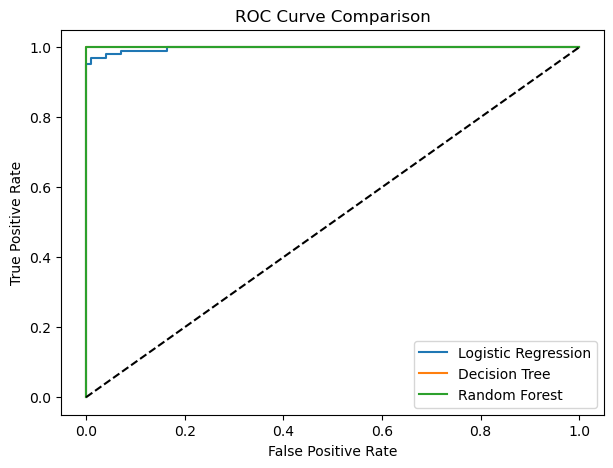

In [32]:
plt.figure(figsize=(7, 5))
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

##  Feature Importance 

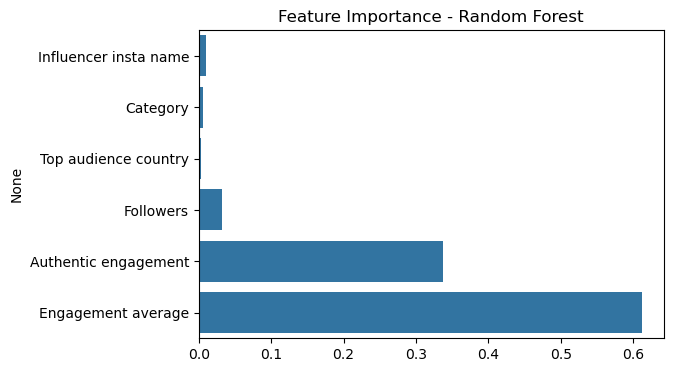

In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    if name == 'Random Forest':
        importance = model.feature_importances_
        plt.figure(figsize=(6, 4))
        sns.barplot(x=importance, y=X_train.columns)
        plt.title(f"Feature Importance - {name}")
        plt.show()

## Decision Tree Plot

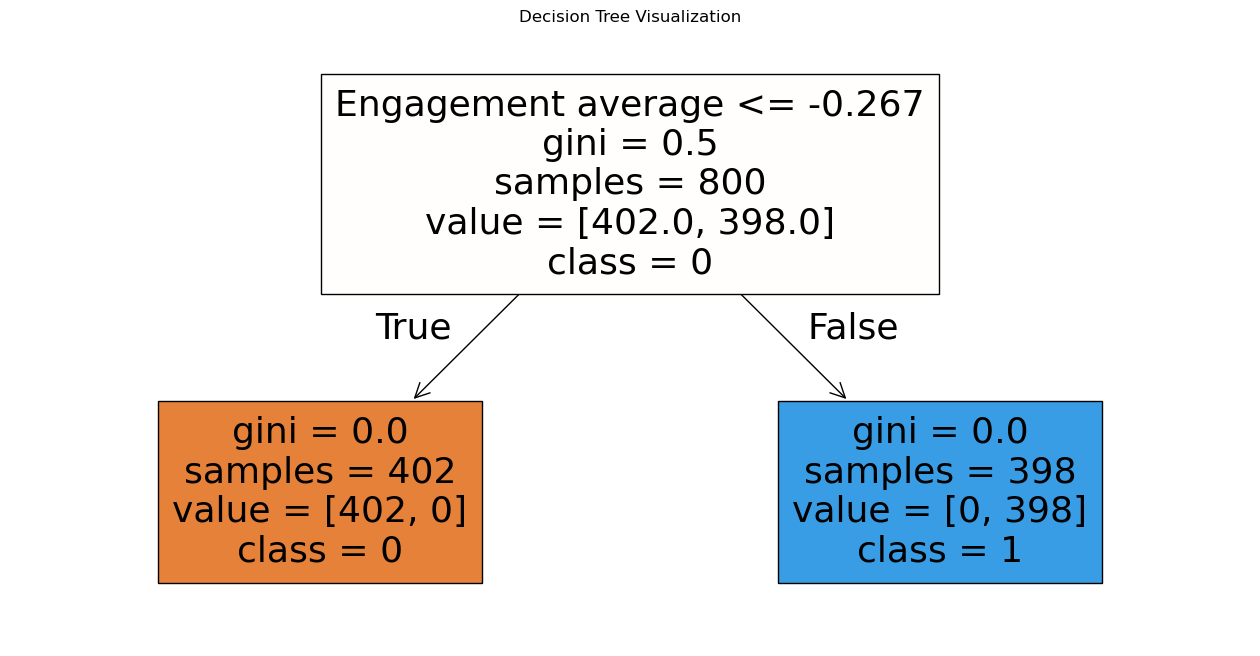

In [35]:
tree_model = models['Decision Tree']
tree_model.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
plot_tree(tree_model, feature_names=X_train.columns, class_names=[str(c) for c in tree_model.classes_], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## Evaluation Metrics (All Models)

In [37]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"🔹 Model: {name}")
    print("Accuracy :", round(accuracy_score(y_test, y_pred), 2))
    print("Precision:", round(precision_score(y_test, y_pred, average='macro'), 2))
    print("Recall   :", round(recall_score(y_test, y_pred, average='macro'), 2))
    print("F1 Score :", round(f1_score(y_test, y_pred, average='macro'), 2))
    print("-" * 40)

🔹 Model: Logistic Regression
Accuracy : 0.97
Precision: 0.98
Recall   : 0.98
F1 Score : 0.97
----------------------------------------
🔹 Model: Decision Tree
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
----------------------------------------
🔹 Model: Random Forest
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
----------------------------------------
